<a href="https://colab.research.google.com/github/Prisci723/InteligenciaArtificial1/blob/main/Laboratorio%206/Lab_6_Aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Información sobre el dataset
Github:
Dataset:https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

**Estudiantes:**
* Arduz Limpias Priscila Ximena Ing. en Ciencias de la Computación
* Pinto Mamani Paola Andrea Ing. de Sistemas
* Zanabria Vega Maria Alejandra Ing de Sistemas


**Conjunto de datos de intención de compra de compradores enlínea**

Un sistema de análisis del comportamiento del comprador en línea en tiempo real que consta de dos módulos que predice simultáneamente la intención de compra del visitante y la probabilidad de abandono del sitio web y los hallazgos respaldan la viabilidad de una predicción precisa y escalable de la intención de compra para un entorno de compra virtual utilizando datos de información de sesión y de secuencia de clics.

En este artículo, proponemos un sistema de análisis del comportamiento del comprador en línea en tiempo real que consta de dos módulos que predicen simultáneamente la intención de compra del visitante y la probabilidad de abandono del sitio web.


De las 12.330 sesiones del conjunto de datos, el 84,5% (10.422) fueron muestras de clases negativas que no terminaron con compras, y el resto (1908) fueron muestras de clases positivas que terminaron con compras.


## Limpieza del dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
dataframe = pd.read_csv("/content/gdrive/MyDrive/Machine learning/Datasets/online_shoppers_intention.csv", sep=",")
print(dataframe)

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

Comprobamos si existen valores nulos

In [ ]:
print(dataframe.isnull().any())

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool


Comprobamos si existen valores no numéricos

In [ ]:
# Verificar si hay valores no numéricos
non_numeric_columns = dataframe.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any()
print("Valores no numéricos en las columnas:")
print(non_numeric_columns)

Valores no numéricos en las columnas:
Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                       True
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                 True
Weekend                    False
Revenue                    False
dtype: bool


Como existen valores no numéricos es que comenzamos con el tratamiento del dataset

In [ ]:
#analizamos los valores contenidos dentro del mes
dataframe['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [ ]:
#convertimos los meses a numeros
dataframe['Month'].replace(['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                        [2, 3, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

También analizamos la columna VisitorType

In [ ]:
dataframe['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

También lo convertimos a valores consecutivos como los valores que contiene están relacionados, con ayuda de Ordinal Encoder

In [ ]:
dataframe['VisitorType'] = enc.fit_transform(dataframe[['VisitorType']])
dataframe['Weekend'] = enc.fit_transform(dataframe[['Weekend']])
dataframe['Revenue'] = enc.fit_transform(dataframe[['Revenue']])

Con el tratamiento ya hecho al dataset volvemos a comprobar si existen valores no numéricos

In [ ]:
non_numeric_columns = dataframe.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any()
print("Valores no numéricos en las columnas:")
print(non_numeric_columns)

Valores no numéricos en las columnas:
Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool


Como nuestro dataset ya está limpio, procedemos a exportarlo y poder descargarlo como archivo

In [ ]:
dataframe.to_csv("online_shoppers_intention_clean.csv", index=False)

## Kmeans con datos sintéticos

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array(
    [[ 0.5,  2.1],
     [- 0.9,  2.4],
     [-2.1,  1.7],
     [-1.2,  0.6],
     [-2.6,  1.4]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=1000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

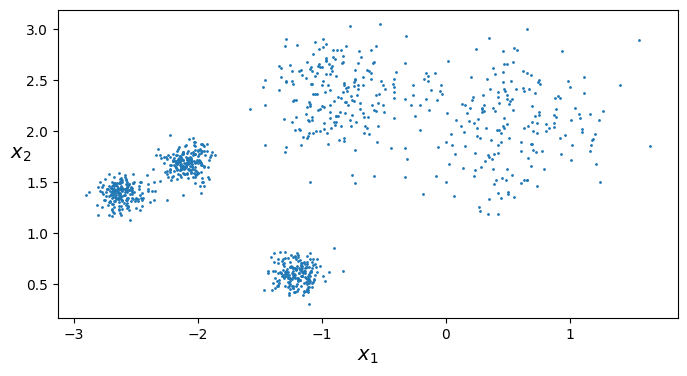

In [ ]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 4, 0, 2, 1, 1, 1, 0, 1, 3, 2, 3, 2, 2, 3, 1, 1, 4, 2, 3,
       3, 3, 4, 0, 0, 3, 2, 4, 1, 3, 2, 0, 2, 1, 2, 2, 0, 0, 4, 4, 2, 0,
       2, 2, 3, 4, 3, 2, 0, 4, 2, 2, 4, 2, 3, 2, 3, 1, 3, 2, 0, 3, 0, 0,
       1, 1, 4, 4, 2, 1, 0, 1, 2, 3, 1, 0, 4, 2, 2, 0, 2, 2, 0, 4, 3, 4,
       2, 3, 3, 4, 3, 3, 4, 1, 2, 1, 0, 1, 4, 2, 0, 3, 1, 1, 0, 1, 1, 1,
       3, 4, 4, 0, 3, 1, 4, 3, 2, 3, 1, 0, 2, 0, 0, 0, 3, 0, 4, 1, 0, 0,
       0, 1, 3, 3, 4, 0, 1, 0, 4, 1, 3, 2, 2, 3, 3, 0, 1, 0, 1, 0, 3, 3,
       4, 4, 3, 2, 0, 3, 2, 1, 4, 1, 1, 1, 1, 1, 3, 1, 2, 2, 0, 3, 2, 2,
       1, 3, 4, 4, 0, 1, 3, 1, 0, 3, 0, 0, 4, 3, 1, 0, 0, 0, 0, 0, 3, 3,
       2, 0, 0, 2, 3, 4, 4, 1, 3, 4, 4, 4, 3, 4, 1, 0, 0, 3, 0, 4, 4, 0,
       0, 2, 2, 0, 1, 2, 4, 2, 4, 2, 4, 4, 2, 4, 0, 4, 2, 4, 1, 0, 4, 3,
       1, 1, 3, 1, 0, 4, 1, 4, 4, 3, 3, 1, 1, 1, 0, 3, 1, 3, 3, 0, 3, 3,
       3, 1, 3, 3, 1, 4, 3, 3, 4, 0, 2, 2, 4, 1, 1, 1, 4, 1, 0, 2, 3, 3,
       4, 0, 1, 2, 1, 2, 2, 3, 3, 4, 3, 3, 0, 0, 1,

Sacamos la localizacion de los cluster

In [ ]:
kmeans.cluster_centers_

array([[-1.20248802,  0.6023078 ],
       [ 0.54659188,  2.05585535],
       [-2.08304454,  1.69284435],
       [-0.83927447,  2.35068375],
       [-2.61244661,  1.38952512]])

con la funcion (predict) le pasamos  muestras nuevas y obtenemos a cluster pertenecen cada muestra

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 4], dtype=int32)

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

In [ ]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Vizualizamos las fronteras de decicion se encontrotodos esos cluster con los centros marcados con una X y todos los puntos que se encuentren en la misma region con el mismo color seran aplicados al cluster


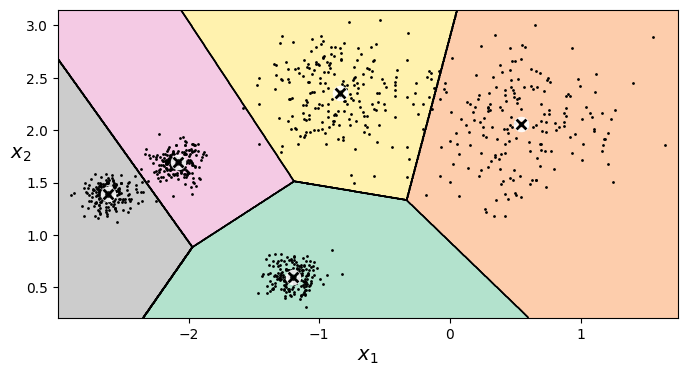

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [ ]:
kmeans.transform(X_new)

array([[1.84377898, 0.54943835, 2.10556861, 0.90959372, 2.68282628],
       [4.42882028, 2.45404385, 5.09231641, 3.85525714, 5.64555015],
       [2.99666101, 3.67011213, 1.59670386, 2.2561796 , 1.65645012],
       [2.613864  , 3.57429411, 1.22160041, 2.16587861, 1.1761599 ]])

In [ ]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

Al empezar de forma aleatoria el algoritmo de cluster va asignar los centros de los grupos forma aleatoria, a continuacion lo que hace es clasificar las muestras que son aleatorias, volvemos a calcular el centro de los cluster utilizando las etiquetas que se asignaron un cluster en el primer paso y hacen que se mueva hacia su pocion correcta.

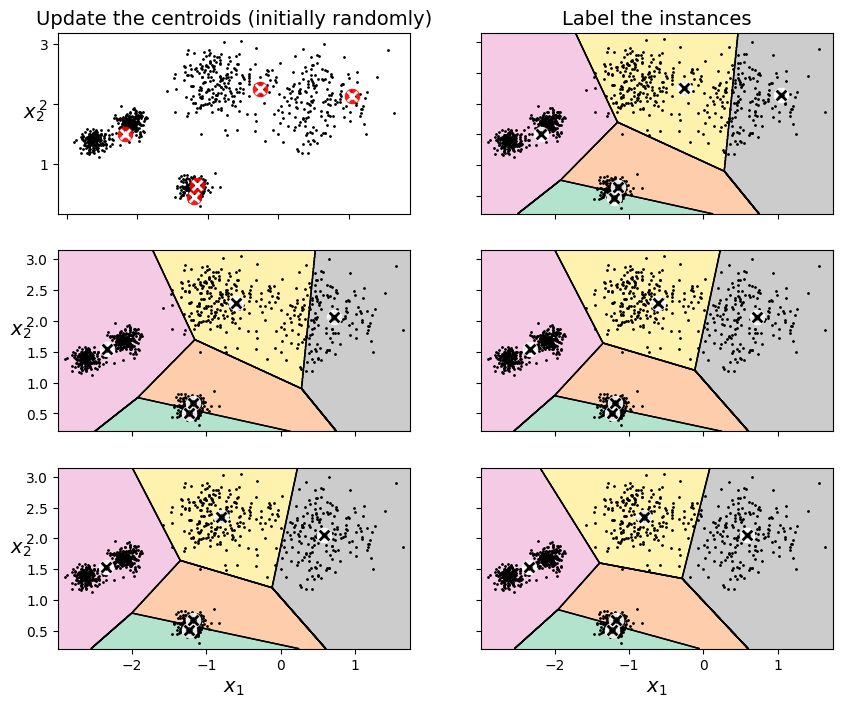

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

En funcion de la inicializacion ban a poder convergen en una buena solucion de soluciones diferentes que no son buenas

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


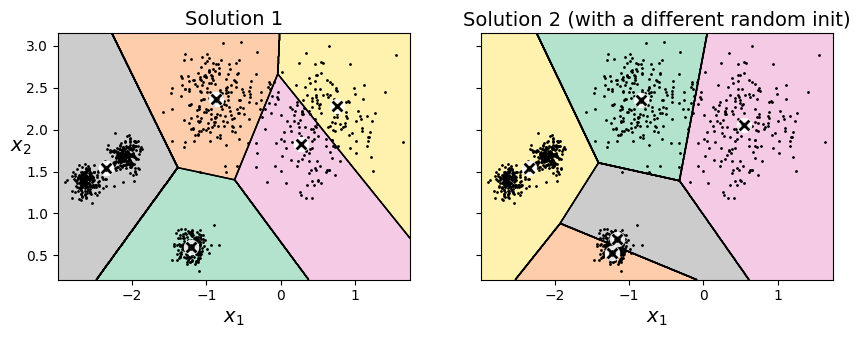

In [ ]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

## Kmeans Dataset

In [ ]:
import numpy as np

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

data = np.loadtxt('/content/gdrive/MyDrive/Machine learning/Datasets/online_shoppers_intention_clean.csv', delimiter=',')
X = data[:, :-1]
test = X.shape[0]*0.8
test = round(test)

X_test = X[test:,:]
X_train = X[:test,:]


In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

X, mu, sigma = featureNormalize(X_train)

def  testNormalize(X, mu, sigma):
    X_norm = X.copy()
    X_norm = (X - mu) / sigma
    m, n = X_norm.shape
    return X_norm

X_test = testNormalize(X_test, mu, sigma)

In [ ]:
print(X.shape)

(9864, 17)


Calculamos varias veces los clusters que se están formando a partir de los datos con distintos inicios de randomización

In [ ]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-2.70919883e-01, -2.20707287e-01, -2.50346333e-01,
        -1.93222547e-01, -2.32461540e-01, -2.10688300e-01,
         6.00464777e-02,  8.94001662e-02, -4.10790422e-02,
         3.11043784e-02, -5.79668473e-02, -4.71032209e-03,
         9.62465190e-03, -5.43477336e-04,  1.19553083e-02,
        -3.29470825e-02, -1.22095335e-02],
       [ 1.50237389e+00,  1.22392223e+00,  1.38828421e+00,
         1.07150685e+00,  1.28910490e+00,  1.16836239e+00,
        -3.32985013e-01, -4.95764558e-01,  2.27801961e-01,
        -1.72487916e-01,  3.21452517e-01,  2.61208770e-02,
        -5.33730697e-02,  3.01382887e-03, -6.62976187e-02,
         1.82706548e-01,  6.77074129e-02]])

In [ ]:
kmeans.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
kmeans.transform(X_test)

array([[5.58284504, 7.48698771],
       [2.6837024 , 4.39025114],
       [3.28736096, 5.32577139],
       ...,
       [3.93876065, 5.9337101 ],
       [2.68839649, 4.23767442],
       [3.90099306, 5.86464869]])

In [ ]:
kmeans_iter1 = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)

In [ ]:
np.random.seed(42)
random_indices = np.random.choice(X.shape[0], size=1000, replace=False)
X_selected = X[random_indices]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


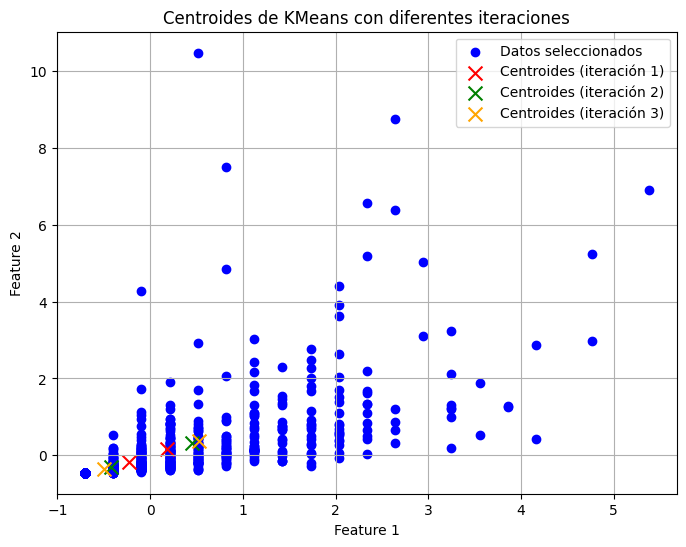

In [ ]:
kmeans_iter1.fit(X_selected)
kmeans_iter2.fit(X_selected)
kmeans_iter3.fit(X_selected)

# Obtener los centroides de cada modelo
centroids_iter1 = kmeans_iter1.cluster_centers_
centroids_iter2 = kmeans_iter2.cluster_centers_
centroids_iter3 = kmeans_iter3.cluster_centers_

# Crear un diagrama de dispersión y graficar los centroides
plt.figure(figsize=(8, 6))
plt.scatter(X_selected[:, 0], X_selected[:, 1], c='blue', label='Datos seleccionados')
plt.scatter(centroids_iter1[:, 0], centroids_iter1[:, 1], marker='x', s=100, c='red', label='Centroides (iteración 1)')
plt.scatter(centroids_iter2[:, 0], centroids_iter2[:, 1], marker='x', s=100, c='green', label='Centroides (iteración 2)')
plt.scatter(centroids_iter3[:, 0], centroids_iter3[:, 1], marker='x', s=100, c='orange', label='Centroides (iteración 3)')
plt.title('Centroides de KMeans con diferentes iteraciones')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters=2, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=2, n_init=10,
       random_state=11)

In [ ]:
def plot_clusterer_comparison(model1, model2, X, title1, title2):
    plt.figure(figsize=(12, 5))

    # Modelo 1
    plt.subplot(1, 2, 1)
    y_pred1 = model1.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred1, cmap='viridis')
    plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1], s=300, c='red', marker='X')
    plt.title(title1)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Modelo 2
    plt.subplot(1, 2, 2)
    y_pred2 = model2.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred2, cmap='viridis')
    plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], s=300, c='red', marker='X')
    plt.title(title2)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


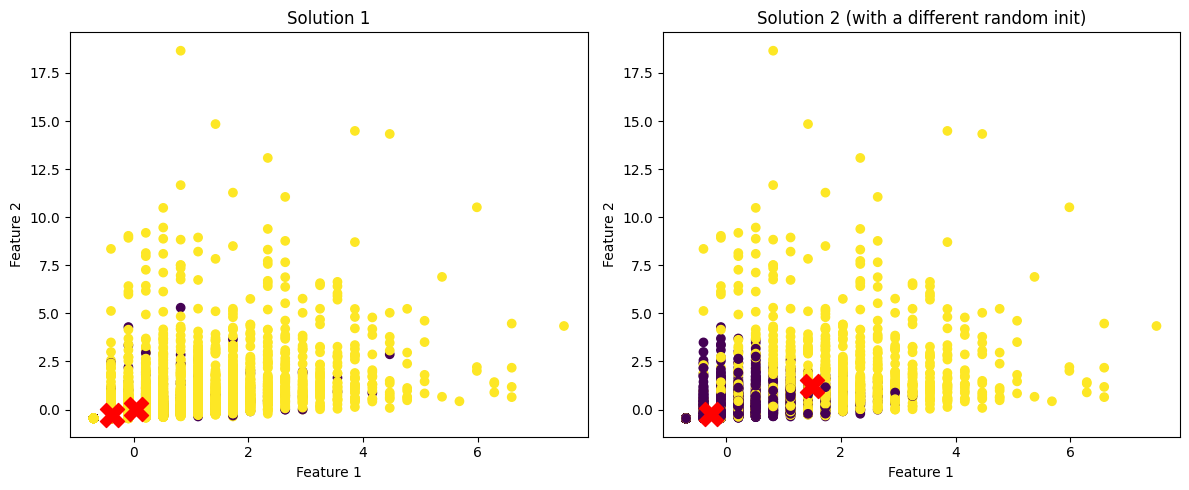

In [ ]:
kmeans_rnd_init1 = KMeans(n_clusters=2, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=2, init="random", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters=2, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=2, n_init=10,
       random_state=11)

In [ ]:
def plot_kmeans_multi_init(model, X):
    plt.figure(figsize=(8, 6))

    # Visualizar los datos
    plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='viridis', alpha=0.6)

    # Visualizar los centroides
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
                marker='x', s=300, c='red', label='Centroids')

    plt.title('KMeans with Multiple Random Initializations')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

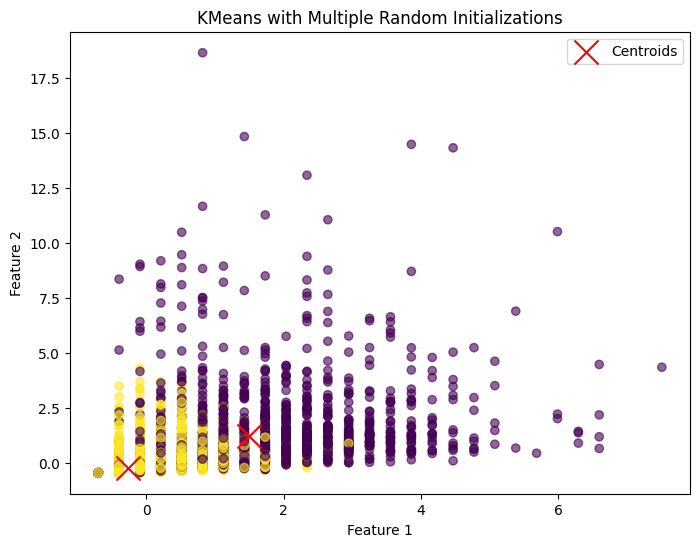

In [ ]:
plot_kmeans_multi_init(kmeans_rnd_10_inits, X)

### Minibatch

Forma optimizada obtener los centroides utilizando minibatch

In [ ]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [ ]:
from sklearn.cluster import MiniBatchKMeans

k = 2
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

In [ ]:
best_kmeans.score(X)

-149182.01862009626

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

data = np.loadtxt('/content/gdrive/MyDrive/IA/DATASET/online_shoppers_intention_clean.csv', delimiter=',')
X = data[:, :-1]
y = data [:, -1]
test = X.shape[0]*0.8
test = round(test)

X_test = X[test:,:]
X_train = X[:test,:]
y_test = y[test:]
y_train = y[:test]

Se carga un batch de X

In [ ]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [ ]:
from sklearn.cluster import MiniBatchKMeans

k = 2  #número de clusters
n_init = 10  #el número de inicializaciones
n_iterations = 100  #número de iteraciones por inicialización
batch_size = 100   # tamaño del lote para las iteraciones
init_size = 500  #tamaño del lote inicia
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_
#minimiza la inercia sobre las muestras de datos
    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

In [ ]:
print("Best Mini-batch KMeans score:", best_kmeans.score(X))

Best Mini-batch KMeans score: -21555985359.93745


### Encontrando el número óptimo de grupos

Como encontrar elnumero optimo de grupos o cluster y para eso usamos el silhouette score. Esta métrica evalúa qué tan cerca está cada muestra de los otros puntos en el mismo cluster y qué tan lejos está de los puntos de los clusters vecinos más cercanos. Un coeficiente de silueta cercano a 1 indica que la muestra está bien clasificada en su cluster, cerca de 0 indica que está cerca del límite entre clusters y cerca de -1 indica que podría estar en el cluster equivocado

In [ ]:
from sklearn.metrics import silhouette_score

# Predice las etiquetas de clusters para el conjunto de datos X utilizando el mejor modelo KMeans
silhouette_score(X, best_kmeans.predict(X))

0.7827722180686109

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

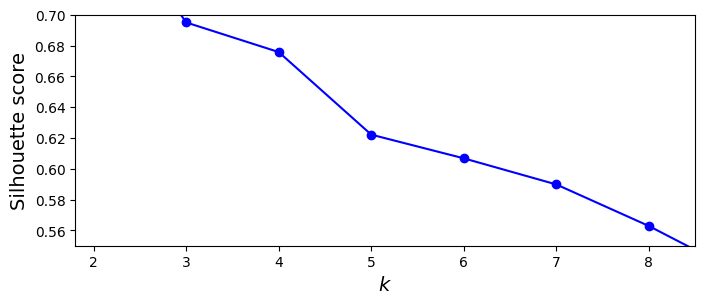

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

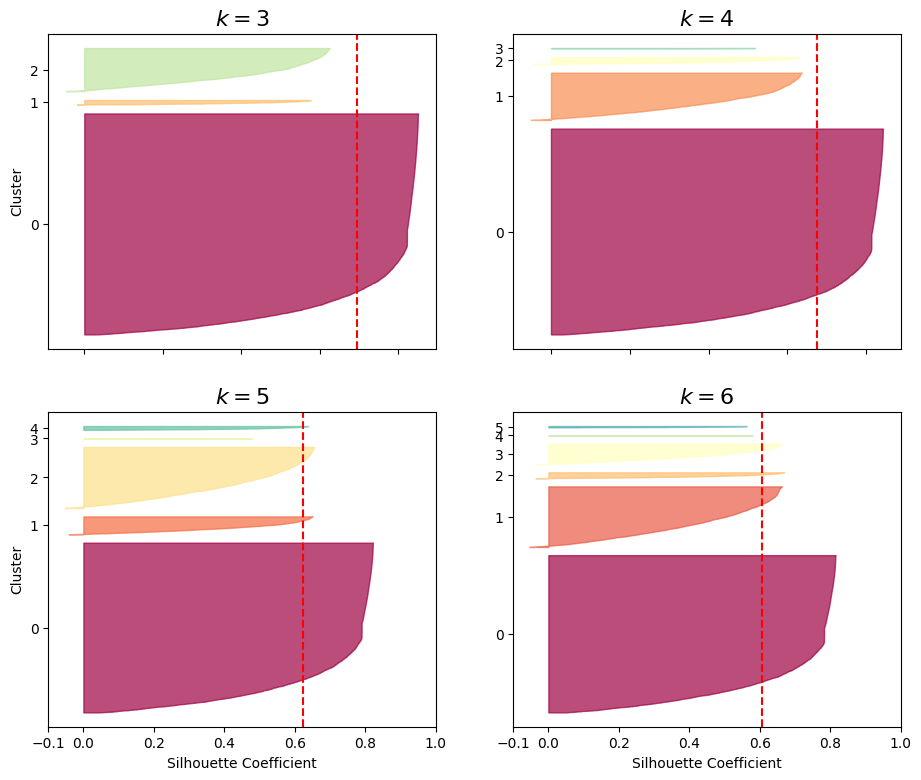

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3,4,5,6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

## Aprendizaje semisupervisado


El aprendizaje semisupervisado es utilizado cuando se cuenta con unos pocos datos etiquetados que ayudarán a guiar a crear clusters más eficientes.

Por lo general los métodos de aprendizaje semisupervisado son utilizados en situaciones que es muy difícil conseguir las etiquetas de los datos, pero fácilmente se puede conseguir grandes volúmenes de datos que no estén etiquetados.
En el siguiente modelo se cuenta con las etiquetas, se evaluará el modelo como si no contara con las etiquetas, pero al momento de ponerlo a prueba compararemos con las etiquetas.

In [ ]:
import numpy as np

Importamos el dataset y separamos el 80% para datos de prueba y 20% para datos entrenamiento

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

data = np.loadtxt('/content/gdrive/MyDrive/Machine learning/Datasets/online_shoppers_intention_clean.csv', delimiter=',')
X = data[:, :-1]
y = data [:, -1]
test = X.shape[0]*0.8
test = round(test)

X_test = X[test:,:]
X_train = X[:test,:]
y_test = y[test:]
y_train = y[:test]

Los datos son normalizados debido a que se encuentran en distintas escalas

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

X_train, mu, sigma = featureNormalize(X_train)

def  testNormalize(X, mu, sigma):
    X_norm = X.copy()
    X_norm = (X - mu) / sigma
    m, n = X_norm.shape
    return X_norm

X_test = testNormalize(X_test, mu, sigma)

Ahora se asume que el dataset no cuenta con etiquetas y lo que se haría es asumir que podrían existir 50 grupos o clusters que clasificarán el dataset

In [ ]:
from sklearn.cluster import KMeans

k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
idxs = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[idxs]

Las etiquetas de y también son cargadas

In [ ]:
y_representative_digits = y_train[idxs]

Ahora se utiliza regresión logística para poder entrenar los datos, ya que cuentan con una etiqueta

In [ ]:
from sklearn.linear_model import LogisticRegression


log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg2.fit(X_representative_digits, y_representative_digits)
log_reg2.score(X_test, y_test)



CPU times: user 13.2 ms, sys: 13.4 ms, total: 26.6 ms
Wall time: 20 ms


0.832522303325223

*Se obtiene una precisión alta, debido a que los datos utilizados son altamente representativos dentro del dataset*

In [ ]:

# Crear una instancia de LogisticRegression para clasificación binaria
log_reg_binary = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)

# Entrenar el modelo de regresión logística binaria con las primeras 200 muestras
%time log_reg_binary.fit(X_train[:200], y_train[:200])

# Calcular la precisión del modelo en el conjunto de prueba
score = log_reg_binary.score(X_test, y_test)
print("Accuracy:", score)


CPU times: user 10.6 ms, sys: 13 ms, total: 23.6 ms
Wall time: 14.8 ms
Accuracy: 0.8073803730738037



Pero ahora se prueba con datos escogidos aleatoriamente podemos ver la precisión disminuye solo un poco, pero es muy probable debido a que nuestro dataset tiene muchas etiquetas con el valor 0, y son escazas las que pertenecen al grupo de 1. Por lo que se puede comprobar que las agrupa en el número de etiquetas más grande

In [ ]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [ ]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
log_reg3.score(X_test, y_test)

CPU times: user 18.6 ms, sys: 17.2 ms, total: 35.8 ms
Wall time: 21.2 ms


0.7822384428223844

Como se puede comprobar con este dataset no es muy visible los cambios aplicados dentro de los distintos métodos aplicados, según este método la precisión debería disminuir debido a que son utilizados grandes volúmenes de datos no relacionados ni representativos

**Aprendizaje Activo**

Consiste en entrenar modelos de manera iterativa y en cada de estas iteraciones lo que se hace es  ver las muestras en las que se esta fallando el modelo etiquetarlas manualmente y volver a entrenar el modelo con las imagenes
que no pudo clasificar

In [ ]:
probas = log_reg3.predict_proba(X_train[:1000])
#obtiene los indicesde las clases con la probabilidad mas alta
labels_ixs = np.argmax(probas, axis=1)
#Se crea arreglos con las correspondientes a las clases predichas
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
#Se ordena los indices de las muestras
sorted_ixs = np.argsort(labels)
#se imprimen las probabilidades delas 10 muesras con menor probabilidad
labels[sorted_ixs[:10]]

array([0.54778117, 0.64729362, 0.72695265, 0.78185762, 0.79483122,
       0.79730877, 0.8059146 , 0.86500825, 0.86616172, 0.90672756])

Etiquetamos las muestras manualmente

In [ ]:
#Tomamos la etiquetas de las primeras 1000 muestras
#Utiliza un indice de clasificacion para seleccionar los primeros k
# y_lowest = y_train.values[:1000][sorted_ixs[:k]]
y_lowest = y_train[:1000][sorted_ixs[:k]]
#utilizamos los indices seleccionados para obtener las etiquetas
#esas etiquetas se guardan en la siguiente variable
y_lowest

array([0., 0.])

In [ ]:
#crea una copia de las primeras 1000 muestras del conjunto de etiquetas
y_train2 = y_train_propagated[:1000].copy()
#actualiza las etiquetas
y_train2[sorted_ixs[:k]] = y_lowest

In [ ]:
#crea una instancia del clasificador con un maximo de 5000 iteraciones y se fija la semilla aleatoria para reproducir
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, y_test)

CPU times: user 1.64 s, sys: 1.85 s, total: 3.49 s
Wall time: 4.39 s


0.7773722627737226